In [46]:
import random, math

from typing import List, Tuple

# Лабораторная работа 1. Методы сортировки

Вариант: 3

## Сортировка Шелла (shell sort)

Другие названия: 

- Сортировка вставками с предварительными «грубыми» проходами

- Сортировка с уменьшением инкремента

### Классификация алгоритма:

- По типу алгоритма: обменная сортировка

- По устойчивости: неустойчивый

- По месту хранения данных: на месте

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(n)$ всего, $O(1)$ дополнительно
   
- Время выполнения: 
  
  - В худшем случае: $O(nlog_2n^2)$
  
  - В лучшем случае: $O(n)$
  
  - В среднем: $O(n^2)$, но зависит от выбранных шагов

### Описание алгоритма:

При сортировке Шелла сначала сравниваются и сортируются между собой значения, отстоящие один от другого на некотором расстоянии d. После этого процедура повторяется для некоторых меньших значений d, а завершается сортировка Шелла упорядочиванием элементов при d=1 (то есть обычной сортировкой вставками). Эффективность сортировки Шелла в определённых случаях обеспечивается тем, что элементы «быстрее» встают на свои места (в простых методах сортировки, например, пузырьковой, каждая перестановка двух элементов уменьшает количество инверсий в списке максимум на 1, а при сортировке Шелла это число может быть больше).

Невзирая на то, что сортировка Шелла во многих случаях медленнее, чем быстрая сортировка, она имеет ряд преимуществ:
- отсутствие потребности в памяти под стек;
- отсутствие деградации при неудачных наборах данных — быстрая сортировка легко деградирует до O(n²), что хуже, чем худшее гарантированное время для сортировки Шелла.

### Блок-схема алгоритма

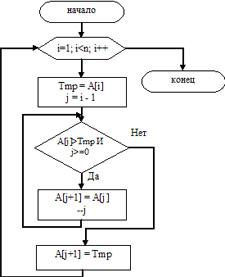

### Псевдокод алгоритма

```
ЗАДАЧА Шелл(a=: РЯД ИЗ ЦЕЛ);
ПЕР
  b,i,j,k,h: ЦЕЛ;
УКАЗ
  b:=РАЗМЕР(a);
  k:=b ДЕЛИТЬ 2;
  ПОКА k>0 ВЫП
    ОТ i:=1 ДО b-k ВЫП
      j:=i;
      ПОКА (j>=1) И (a[j]>a[j+k]) ВЫП
        h:=a[j];
        a[j]:=a[j+k];
        a[j+k]:=h;
        УМЕНЬШИТЬ(j);
      КОН;
    КОН;
    k:=k ДЕЛИТЬ 2
  КОН
КОН Шелл;
```


### Реализация алгоритма

Достоинства алгоритма:
    
    --  отсутствие потребности в памяти под стек;
    --  отсутствие деградации при неудачных наборах данных.
    
Недостатки:

    --  во многих случаях медленнее, чем быстрая сортировка;
    --  является неустойчивым алгоритмом.

In [120]:
def shellSort(data):
    inc = len(data) // 2
    while inc:
        for i, el in enumerate(data):
            while i >= inc and data[i - inc] > el:
                data[i] = data[i - inc]
                i -= inc
            data[i] = el
        inc = 1 if inc == 2 else int(inc * 5.0 / 11)
    return data

In [ ]:
### Ручная трассировка

По образцу Седжвик стр. 251

In [121]:
### Тестирование программы

sortmethod = shellSort

assert sortmethod([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного массива'

assert sortmethod([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировки отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировки произвольного массива'

assert sortmethod([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировки массива с повторящимися элементами'


In [122]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->Tuple:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->Tuple:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->Tuple:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))


In [142]:
n1 = 1000
n2 = 5000
n3 = 10000
n4 = 100000

x1_sort = get_sort_array(n1)
x1_reverse = get_reverse_array(n1)
x1_random = get_random_array(n1)
x2_sort = get_sort_array(n2)
x2_reverse = get_reverse_array(n2)
x2_random = get_random_array(n2)
x3_sort = get_sort_array(n3)
x3_reverse = get_reverse_array(n3)
x3_random = get_random_array(n3)
x4_sort = get_sort_array(n4)
x4_reverse = get_reverse_array(n4)
x4_random = get_random_array(n4)

In [143]:
%%time

sortmethod(list(x1_sort));

CPU times: total: 0 ns
Wall time: 1.63 ms


In [144]:
%%time

sortmethod(list(x1_reverse));

CPU times: total: 0 ns
Wall time: 0 ns


In [145]:
%%time

sortmethod(list(x1_random));

CPU times: total: 0 ns
Wall time: 8.5 ms


In [146]:
%%time

sortmethod(list(x2_sort));

CPU times: total: 0 ns
Wall time: 5.76 ms


In [147]:
%%time

sortmethod(list(x2_reverse));

CPU times: total: 15.6 ms
Wall time: 8.01 ms


In [148]:
%%time

sortmethod(list(x2_random));

CPU times: total: 15.6 ms
Wall time: 16.4 ms


In [149]:
%%time

sortmethod(list(x3_sort));

CPU times: total: 15.6 ms
Wall time: 14.8 ms


In [150]:
%%time

sortmethod(list(x3_reverse));

CPU times: total: 0 ns
Wall time: 16.6 ms


In [151]:
%%time

sortmethod(list(x3_random));

CPU times: total: 31.2 ms
Wall time: 40.8 ms


In [152]:
%%time

sortmethod(list(x4_sort));

CPU times: total: 188 ms
Wall time: 196 ms


In [153]:
%%time

sortmethod(list(x4_reverse));

CPU times: total: 344 ms
Wall time: 329 ms


In [154]:
%%time

sortmethod(list(x4_random));

CPU times: total: 500 ms
Wall time: 517 ms


In [6]:
#Илюстрация работы алгоритма 

def shellSort(data):
    temp = 1
    inc = len(data) // 2
    while inc:
        for i, el in enumerate(data):
            if not (i == 0 and inc == 1):
                print('i =', temp)
                temp += 1
                print_swap(data, i, i - inc)
            while i >= inc and data[i - inc] > el:
                data[i] = data[i - inc]
                i -= inc
            data[i] = el
        inc = 1 if inc == 2 else int(inc * 4.0 / 11)
    return data
    
def print_swap(A, i, j):
    '''Иллюстрация обмена элементов'''
    s = [f' {str(a):<3}'  for a in A]
    s[i] = f'<{s[i].strip()}>'
    s[j] = f'<{s[j].strip()}>'
    s = ' '.join(s)
    I = s.find('<')
    J = s.rfind('>') - I - 3
    swap_str = ' ' + ' '*I + '^' + '-'*J + '^'
    print(s)
    print(swap_str, end='\n\n\n')
    
    
A = [5, 6, 12, 7, 8]
A = shellSort(A)

i = 1
<5>  6    12  <7>  8  
 ^-------------^


i = 2
 5   <6>  12   7   <8>
      ^-------------^


i = 3
<5>  6   <12>  7    8  
 ^---------^


i = 4
 5   <6>  12  <7>  8  
      ^--------^


i = 5
 5    6   <12>  7   <8>
           ^---------^


i = 6
<5> <6>  8    7    12 
 ^---^


i = 7
 5   <6> <8>  7    12 
      ^---^


i = 8
 5    6   <8> <7>  12 
           ^---^


i = 9
 5    6    7   <8> <12>
                ^----^




https://www.youtube.com/watch?v=CmPA7zE8mx0

### Литература

Роберт Седжвик. Фундаментальные алгоритмы на C. Анализ/Структуры данных/Сортировка/Поиск = Algorithms in C. Fundamentals/Data Structures/Sorting/Searching. — СПб.: ДиаСофтЮП, 2003. — С. 672. — ISBN 5-93772-081-4.

https://ru.overleaf.com/learn/latex/LaTeX_Graphics_using_TikZ%3A_A_Tutorial_for_Beginners_(Part_3)%E2%80%94Creating_Flowcharts

https://www.ctan.org/pkg/nassflow